!pip install -U gym gym[other] tensorflow keras autorom gym[accept-rom-license] gym[atari] torch

In [1]:
import numpy as np
from collections import deque
import gym


In [2]:
env = gym.make("Breakout-v4", obs_type='grayscale', render_mode='rgb_array', full_action_space=False, frameskip=4)
env = gym.wrappers.AtariPreprocessing(env=env, frame_skip=1, terminal_on_life_loss=True)
env = gym.wrappers.FrameStack(env=env, num_stack=4)
# env = gym.wrappers.RecordVideo(env, 'videos', episode_trigger= lambda x : x % 30 == 0)


A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/home/meliioko/dqn-breakout/.venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (210, 160)
  logger.warn(


In [3]:
from dqn import play_train
dico = play_train(M=100000, env=env, epsilon=1, epsilon_decay=0.99, epsilon_min=0.1, gamma=0.99, Q_weights=None, D=None, N=40000 ,max_step= 10000)

Using GPU: NVIDIA GeForce RTX 2060


  0%|          | 0/100000 [00:00<?, ?it/s]/home/meliioko/dqn-breakout/.venv/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
 30%|███       | 30022/100000 [05:51<15:51, 73.51it/s]  

NameError: name 'frame_idx' is not defined

 30%|███       | 30023/100000 [06:10<15:51, 73.51it/s]

: 

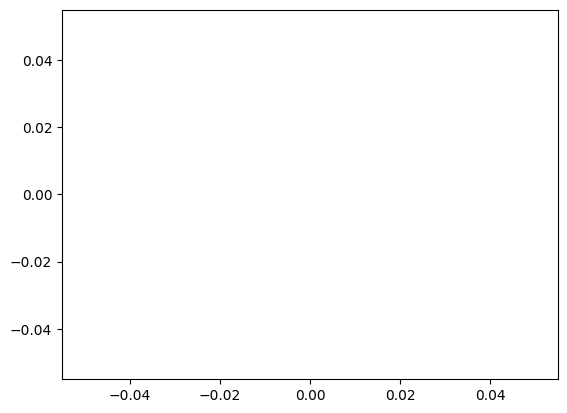

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dico['loss_list'])

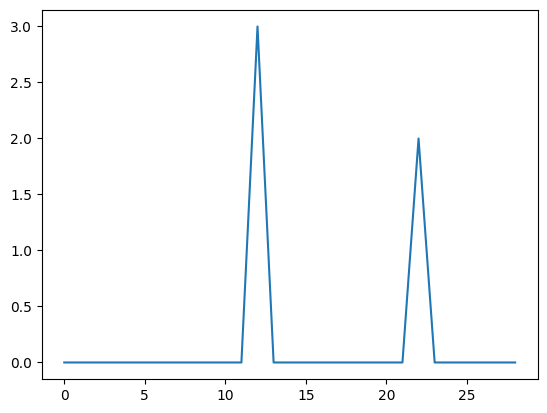

In [ ]:
plt.plot(dico['reward_list'])

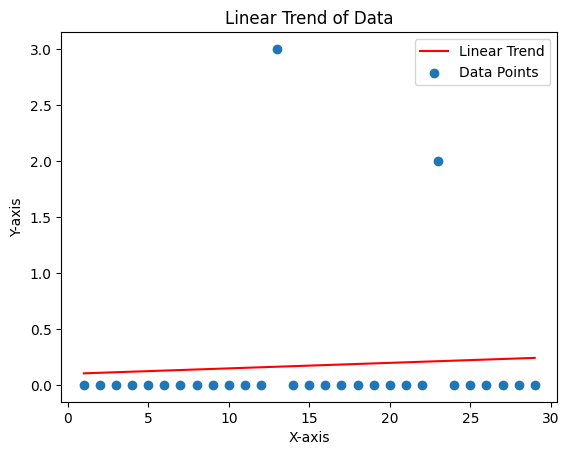

In [ ]:
# Fit the linear model
x = np.arange(1, len(dico['reward_list']) + 1)
y = dico['reward_list']
def linear_trend(x, y):
    coefficients = np.polyfit(x, y, 1)  # 1 means linear
    polynomial = np.poly1d(coefficients)

    # Generate a number of points for the x-axis (from min to max of your original x)
    x_trend = np.linspace(x.min(), x.max(), 100)
    # Predict the y values
    y_trend = polynomial(x_trend)

    # Plot the linear trend
    plt.plot(x_trend, y_trend, label='Linear Trend', color='red')

    # Optionally, if you want to plot the original data points:
    plt.scatter(x, y, label='Data Points')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Linear Trend of Data')
    plt.legend()
    plt.show()

linear_trend(x, y)

state = preprocess_state(env.reset()[0])# Add batch dimension
total_reward = 0
q_values = []
while(True):
  with torch.no_grad():  # No need to track gradients here
    act_values = Q(state)
    action = act_values.max(1)[1].item()  # Choose the action with the highest Q-value
    q_values.append(act_values.to('cpu').numpy())
    next_state, reward, done, _, _ = env.step(action)
    total_reward += reward
    if done:
      break
    state = preprocess_state(next_state)
print(total_reward)